## 1. Basic Libraries requirement

In [27]:
import numpy as np #Linear algebra library
import pandas as pd # data processing library/ CSV file IO 


import os
for dirname, _, filenames in os.walk('D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input'): #Function to traverse a direction tree starting from specified path
    for filename in filenames:
        print(os.path.join(dirname, filename))

# The outer loop iterates over these tuples, unpacking them into dirname, subdirs, and filename.
# The inner loop then iterates over the list of filenames in the current directory, printing the pull path
# of each file by joining the direction name and the filename using os.path.join()

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input\heart.csv
D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input\o2Saturation.csv


## 2. Loading the Dataset

In [30]:
df = pd.read_csv("D:\Htb_dev\Heart_Attack_Analysis_And_Prediction\input\heart.csv")
# Read csv file from the path above

In [31]:
df 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2.1 Initial analysis on the dataset

In [33]:
df.head(10) # show first 10 rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [37]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [40]:
df.columns = new_columns # assign column names
df.head() 
# you can check the name of some columns has been changed

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [42]:
df.info()

# The Data Set consists of 3030 Rows and 14 Columns
# The type of all the variables in the data set are in numerical format.
# According to first impression, there is no missing value(NaN value) in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 3. Prepare for Exploratory Data Analysis (EDA)

### 3.1 Examining Missing Values

In [44]:
df.isnull().sum() 
# there is no missing value(NaN value) in the data set

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
isnull_number = []
for index in df.columns:
    x = df[index].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


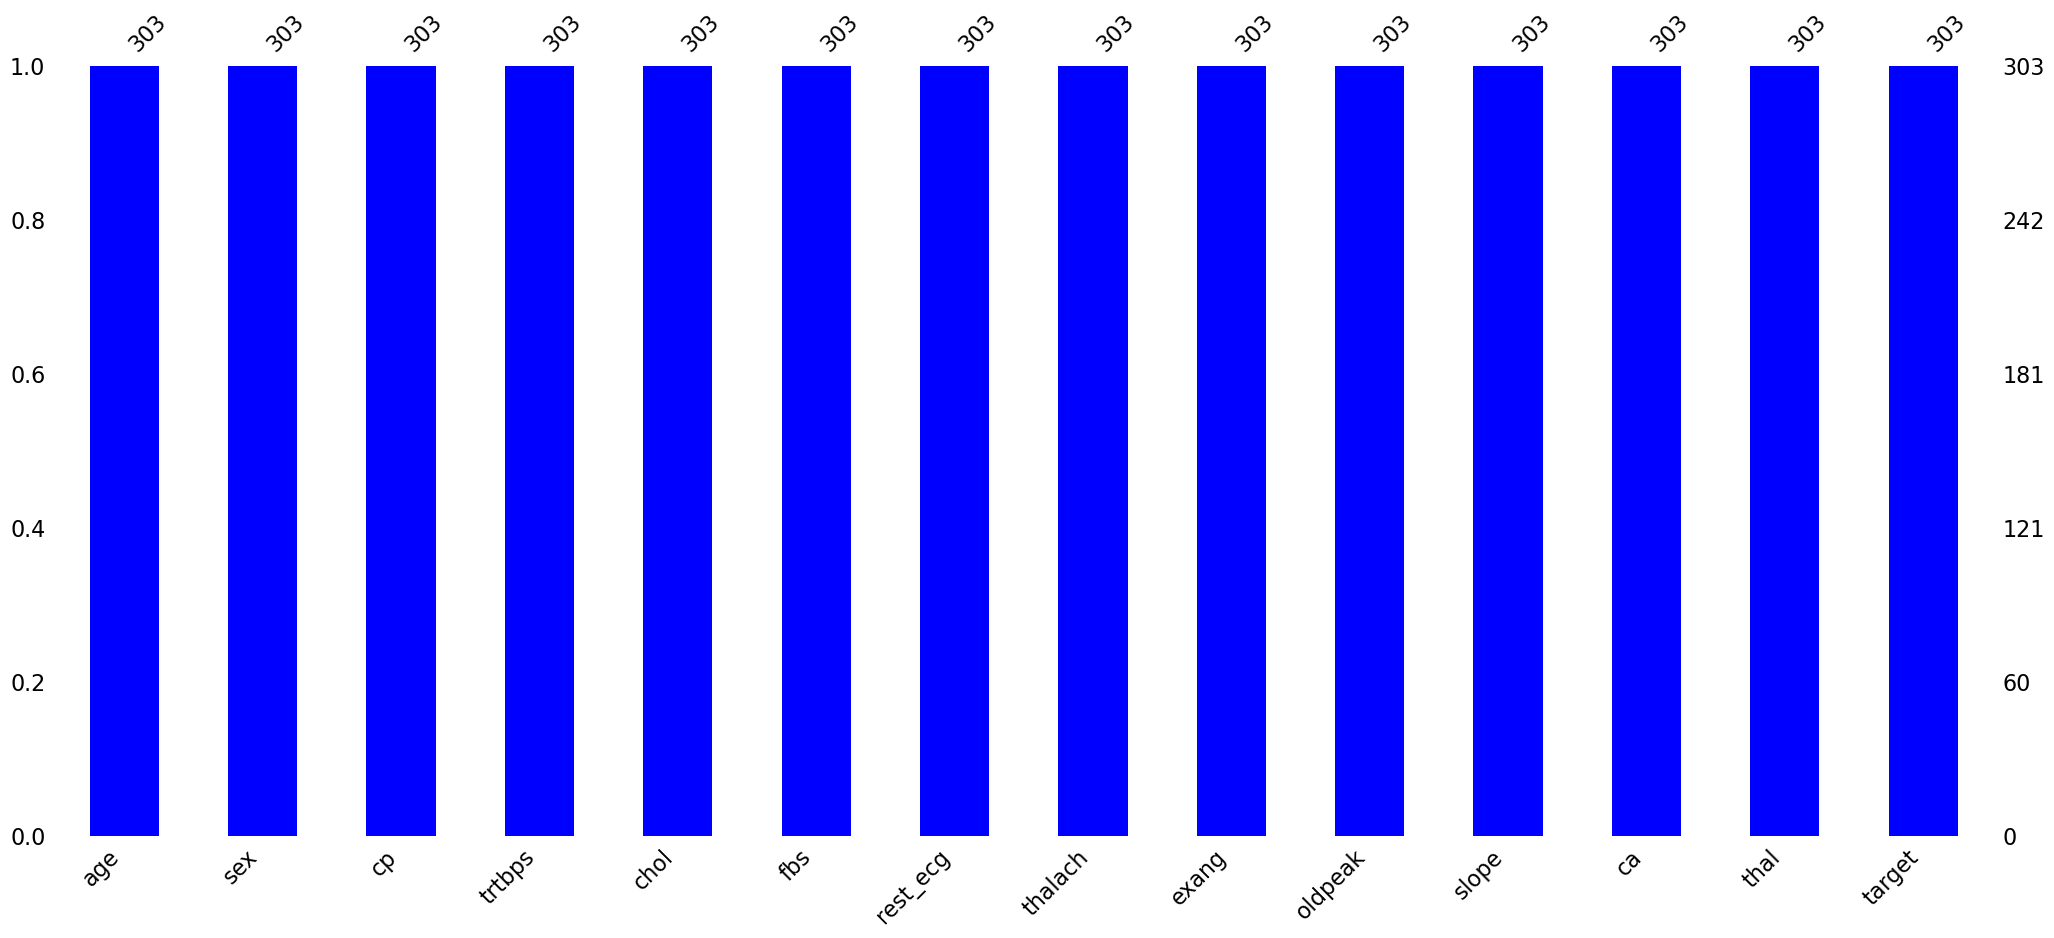

In [47]:
import missingno
missingno.bar(df, color= "b")
plt.show()

### 3.2 Examining Unique Values

In [48]:
# UNique value is the observation values that are not
# similar to each other in the variables.

df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
unique_number = []
for index in df.columns:
    x = df[index].value_counts().count() # declare the total variable in each column and count for the distinction
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


**Analysis Outputs**
* According to the result from the unique value dataframe:
    * We determined the variables with few unique values as categorical variables, and the variables with high unique as numeric variables.
    * In this context, **Numeric Variables**: "age", "trtbps", "chol", "thalach" and "oldpeak"
    * **Categorical Variables**: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal" and "target"

### 3.3 Separating Variables (Numeric or Categorical)

In [55]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### 3.4 Examining Statistics of Variables

In [58]:
# Apply the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()
# The analyzes we infered from the describe method are below the graphs of
# each variable below. 

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000
